<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 2</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px">Modèles de régression</span>  </h1>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy                         as np
import pandas                        as pd
import matplotlib.pyplot             as plt
from IPython.display                 import display, HTML, Math, Image
from sklearn.linear_model            import LinearRegression, LogisticRegression
from sklearn.preprocessing           import PolynomialFeatures, StandardScaler
from sklearn.pipeline                import Pipeline
from sklearn                         import datasets
from matplotlib.colors               import ListedColormap
import matplotlib.animation          as animation
import os

<hr style='border-top:4px solid #1F77B4;'>

In [2]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf", bbox_inches='tight')
    fig.savefig(f"{path}.png", format="png", bbox_inches='tight')
    fig.savefig(f"{path}.jpg", format="jpg", bbox_inches='tight')

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.1 : Génération de données bruitées</h3>

In [3]:
# Fixer la graine pour garantir la reproductibilité des résultats
np.random.seed(42)  

# Définir le nombre d'observations
m = 100  

# Génération d'un ensemble de données X selon une distribution uniforme 
X = np.random.rand(m, 1)

# Calcul des valeurs cibles sans bruit (modèle déterministe : y = 3x + 2)
y_o = 3 * X + 2

# Ajout d'un bruit gaussien centré pour simuler des données bruitées
# Les données sont les données originales
y = 3 * X + 2 + np.random.randn(m, 1)

In [4]:
# np.random.seed(42)

# m = 100  # Nombre d'observations

# # Génération des données X aléatoires
# X  = np.random.rand(m, 1) 
# y1 = 3 * X + 2

# # Génération des données y avec du bruit
# y  = 3 * X + 2 + np.random.randn(m, 1) 

<h3><span style="font-size: 30px">🎴</span> Figure 2.2 : Un ensemble de données originales (a) et de données auxquelles a été ajouté un bruit gaussien (b) </h3>

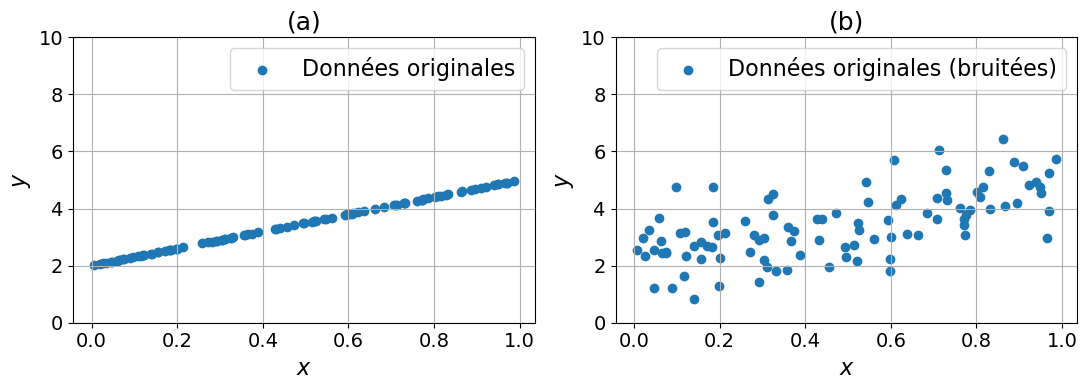

In [5]:
# Définition des tailles de police
label_fontsize  = 16  # Taille des labels des axes
title_fontsize  = 18  # Taille du titre
legend_fontsize = 16  # Taille de la légende
tick_fontsize   = 14  # Taille des ticks X et Y

# Création des sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(11, 4))  # Utilisation de subplots

# Premier sous-graphe : données sans bruit
axs[0].scatter(X, y_o, label="Données originales")
axs[0].set_xlabel("$x$", fontsize=label_fontsize)
axs[0].set_ylabel("$y$", fontsize=label_fontsize)
axs[0].set_ylim(0, 10)
axs[0].set_title("(a)", fontsize=title_fontsize)
axs[0].grid(True)
axs[0].legend(fontsize=legend_fontsize)
axs[0].tick_params(axis='both', labelsize=tick_fontsize)

# Deuxième sous-graphe : données avec bruit
axs[1].scatter(X, y, label="Données originales (bruitées)")
axs[1].set_xlabel("$x$", fontsize=label_fontsize)
axs[1].set_ylabel("$y$", fontsize=label_fontsize)
axs[1].set_ylim(0, 10)
axs[1].set_title("(b)", fontsize=title_fontsize)
axs[1].grid(True)
axs[1].legend(fontsize=legend_fontsize)
axs[1].tick_params(axis='both', labelsize=tick_fontsize)

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.2/Chap2_Figure_2.2")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.2 : Méthode analytique en utilisant linalg.inv</h3>

In [6]:
# Ajout de x0 = 1 à chaque observation (pour inclure le biais)
X_b = np.c_[np.ones((m, 1)), X]  # Ajout de la colonne de 1 pour le biais

# Implémentation de l'équation normale
# Formule : theta = (X_b^T * X_b)^(-1) * X_b^T * y
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# S'assurer que theta_hat est un vecteur 1D pour éviter les erreurs d'affichage
theta_hat = theta_hat.ravel()

In [7]:
# Affichage des résultats
print("=" * 40)
print(" Résultats de la régression linéaire ")
print("=" * 40)
print("{:<15} {:<20}".format("Paramètre", "Valeur"))
print("-" * 40)
print("{:<15} {:<20.6f}".format("Theta_0 (biais)", theta_hat[0]))
print("{:<15} {:<20.6f}".format("Theta_1 (pente)", theta_hat[1]))
print("=" * 40)
print("L'équation de la droite est donc :")
print(f"y = {theta_hat[0]:.6f} + {theta_hat[1]:.6f} * x")
print("=" * 40)

 Résultats de la régression linéaire 
Paramètre       Valeur              
----------------------------------------
Theta_0 (biais) 2.215096            
Theta_1 (pente) 2.540227            
L'équation de la droite est donc :
y = 2.215096 + 2.540227 * x


<h3><span style="font-size: 30px">🎴</span> Figure 2.3 : Droite de régression y = 2.21 + 2.54x obtenue par l'équation normale </h3>

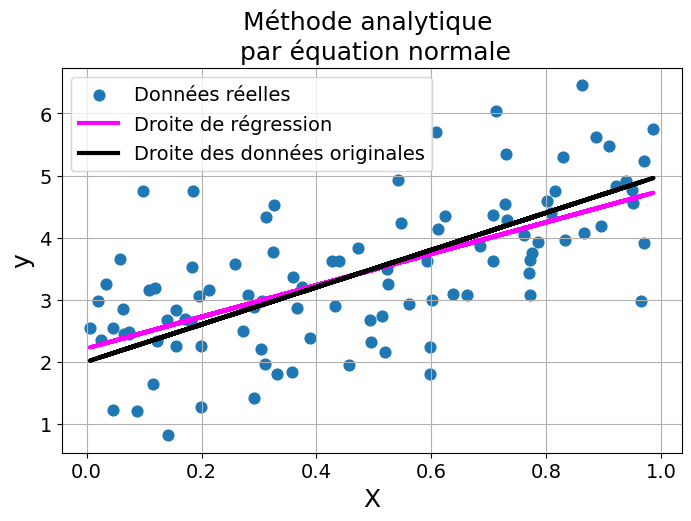

In [8]:
# Tracé de la droite de régression
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X, y, s=60, label='Données réelles')  # Tracé des points réels avec transparence
ax.plot(X, X_b.dot(theta_hat), color='magenta', label='Droite de régression', linewidth=3)  # Tracé de la droite ajustée
ax.plot(X, y_o, color='black', label='Droite des données originales', linewidth=3)  # Tracé de la droite ajustée

# Set x and y labels with specific font sizes
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('y', fontsize=18)

# Set title with a specific font size
ax.set_title(f'Méthode analytique \n par équation normale', fontsize=18)

# Set tick label size for both x and y axes
ax.tick_params(axis='both', labelsize=14)

# Set legend font size
ax.legend(fontsize=14)

# Add grid
ax.grid(True)

# Affichage de la figure
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.3/Chap2_Figure_2.3")


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.3 : Calcul de l'erreur absolue ou et de l'erreur relative des paramètres du modèle de régression</h3>

In [9]:
from sklearn.metrics import r2_score

# Définition des vrais paramètres (d'après la génération des données : y = 3*X + 2)
theta_true = np.array([2.0, 3.0])  # [biais, pente]

# Erreur absolue
error_abs = np.abs(theta_hat - theta_true)

# Erreur relative (en %)
error_rel = np.abs((theta_hat - theta_true) / theta_true) * 100

# Calcul du coefficient de détermination R2
y_pred = X_b.dot(theta_hat.reshape(-1,1))
r2 = r2_score(y, y_pred)

In [10]:
# Affichage des résultats
print("=" * 60)
print("        Évaluation du modèle de régression linéaire ")
print("=" * 60)
print("{:<15} {:>20} {:>20}".format("Paramètre", "Erreur absolue", "Erreur relative (%)"))
print("-" * 60)
print("{:<15} {:>20.6f} {:>20.2f}".format("Theta_0 (biais)", error_abs[0], error_rel[0]))
print("{:<15} {:>20.6f} {:>20.2f}".format("Theta_1 (pente)", error_abs[1], error_rel[1]))
print("=" * 60)
print()
print("Coefficient de détermination R2 = {:.4f}".format(r2))

        Évaluation du modèle de régression linéaire 
Paramètre             Erreur absolue  Erreur relative (%)
------------------------------------------------------------
Theta_0 (biais)             0.215096                10.75
Theta_1 (pente)             0.459773                15.33

Coefficient de détermination R2 = 0.4121


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.4 : Méthode analytique par décomposition en valeurs singulières</h3>

In [11]:
from sklearn.linear_model import LinearRegression

# Initialisation du modèle
lin_reg = LinearRegression()

# Entraînement du modèle sur les données d'entrée X et les cibles y
lin_reg.fit(X, y)

# Extraction des valeurs des paramètres du modèle
intercept = lin_reg.intercept_.item()
coef = lin_reg.coef_.flatten()[0]

In [12]:
# Affichage des résultats
print("=" * 50)
print(" Résultats de la régression linéaire ")
print(" avec LinearRegression ")
print("=" * 50)

# Affichage sous forme de tableau structuré
print("{:<20} {:<20}".format("Paramètre", "Valeur"))  # En-tête du tableau
print("-" * 50)
print("{:<20} {:<20.6f}".format("Intercept (biais)", intercept))  # Affichage de l'intercept
print("{:<20} {:<20.6f}".format("Coefficient (pente)", coef))  # Affichage du coefficient

print("=" * 50)

# Affichage de l'équation de la droite ajustée
print("L'équation de la droite ajustée est :")
print(f"y = {intercept:.6f} + {coef:.6f} * x")  # Affichage de l'équation sous forme standard
print("=" * 50)


 Résultats de la régression linéaire 
 avec LinearRegression 
Paramètre            Valeur              
--------------------------------------------------
Intercept (biais)    2.215096            
Coefficient (pente)  2.540227            
L'équation de la droite ajustée est :
y = 2.215096 + 2.540227 * x


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.5 : Initialisation des paramètres et des hyperparamètres</h3>

In [13]:
np.random.seed(42)

# Hyperparamètres de la descente de gradient
learning_rate = 0.1  # Taux d'apprentissage
n_iterations  = 100  # Nombre d'itérations   

# Paramètres (theta_0 et theta_1)
theta = np.random.randn(2, 1)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.6 : Mise à jour des paramètres "theta" par descente de gradient ordinaire</h3>

In [14]:
# Exécution de la descente de gradient
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Calcul des gradients pour MSE
    theta = theta - learning_rate * gradients  # Mise à jour des paramètres

In [15]:
# Résultat final des paramètres après n itérations
print(f"Résultats après {n_iterations} itérations de descente de gradient :")
print(f"{'Paramètre':<20} {'Valeur':<15}")
print("-" * 50)
print(f"Theta_0 (intercept)  : {theta[0][0]:.6f}")
print(f"Theta_1 (pente)      : {theta[1][0]:.6f}")
print("=" * 50)
print("L'équation de la droite ajustée est :")
print(f"y = {theta[0][0]:.6f} + {theta[1][0]:.6f} * x")
print("=" * 50)

Résultats après 100 itérations de descente de gradient :
Paramètre            Valeur         
--------------------------------------------------
Theta_0 (intercept)  : 2.390256
Theta_1 (pente)      : 2.194057
L'équation de la droite ajustée est :
y = 2.390256 + 2.194057 * x


<h3><span style="font-size: 30px">🎴</span> Figure 2.7 : Droite de régression obtenue par une descente de gradients ordinaire </h3>

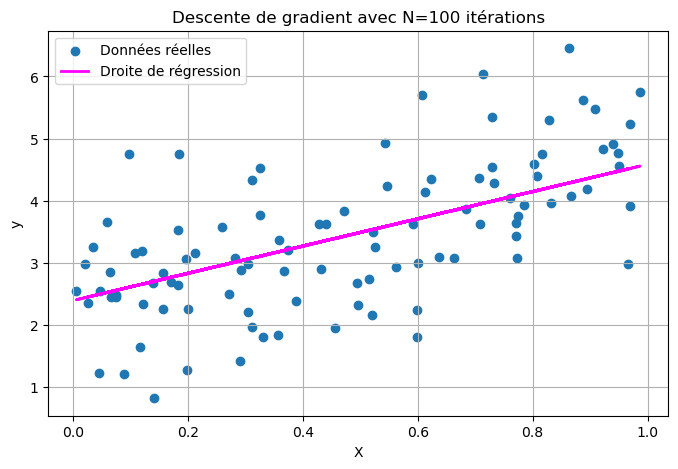

In [16]:
# Tracé de la droite de régression
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X, y, label='Données réelles')  # Tracé des points réels avec transparence
ax.plot(X, X_b.dot(theta), color='magenta', label='Droite de régression', linewidth=2)  # Tracé de la droite ajustée
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title(f'Descente de gradient avec N={n_iterations} itérations')
ax.legend()
ax.grid(True)

# Affichage de la figure
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.7/Chap2_Figure_2.7")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.7 : Représentation de la progression de la droite de régression en fonction du pas</h3>

In [17]:
# Fonction utilisé pour la représentation de la droite de régression
def draw_theta(X, Y, eta, Theta, X_b, m, line_width, iteration, ax, draw_plot=True):
    # Calcul des gradients et mise à jour de Theta
    gradients = 2 / m * X_b.T.dot(X_b.dot(Theta) - Y)
    Theta = Theta - eta * gradients
    y_pred = Theta[0] + Theta[1] * X
    
    # Si draw_plot est True, on trace la droite de régression sur l'axe spécifique
    if draw_plot:
        ax.plot(X, y_pred, linestyle='-', linewidth=line_width, label=f'Itération {iteration}')
    
    return Theta

In [18]:
# Fonction pour calculer le loss (MSE)
def compute_loss(X_b, y, theta, m):
    y_pred = X_b.dot(theta)
    mse = (1 / m) * np.sum((y_pred - y) ** 2)
    return mse

<h3><span style="font-size: 30px">🎴</span> Animation de la descente de gradient : évolution des droites de régression pour différents taux d'apprentissage</h3>

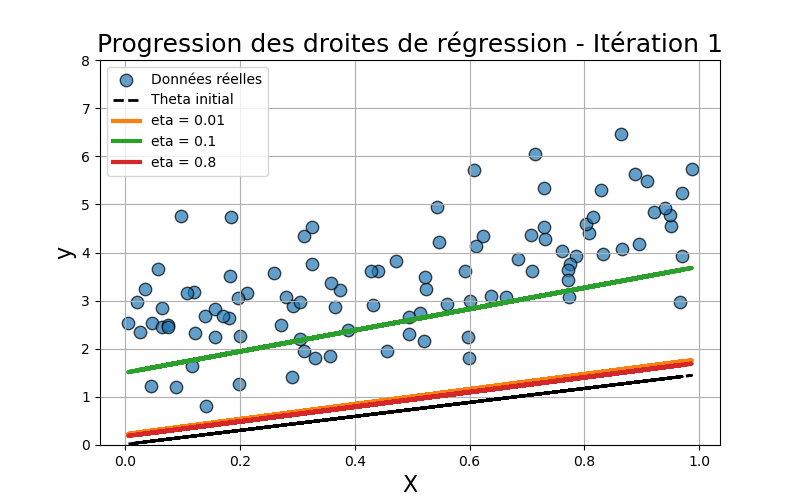

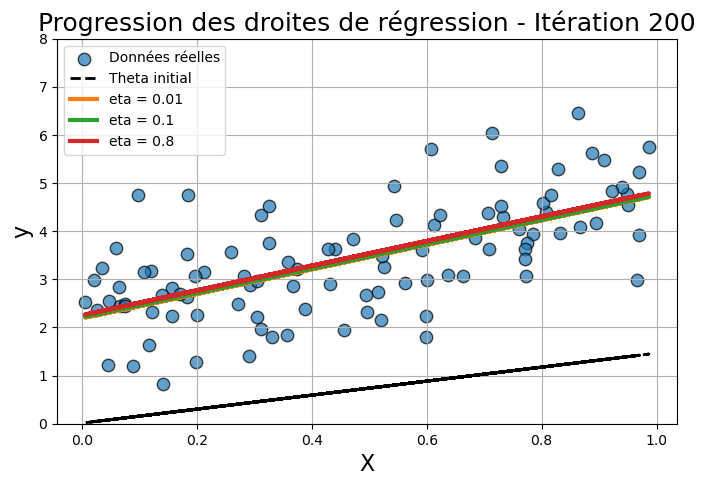

In [19]:
# Génération de données bruitées
np.random.seed(42)
m = 100  # Nombre d'observations
# Génération des données X aléatoires
X  = np.random.rand(m, 1) 
# Génération des données y avec du bruit
y  = 3 * X + 2 + np.random.randn(m, 1) 
X_b = np.c_[np.ones((m, 1)), X]  # Ajout de x0 = 1 à chaque observation
true_theta = np.array([[2], [3]])  # Paramètres vrais pour générer y

# Paramètres de l'animation et de la descente de gradient
n_iterations = 200
list_eta = [0.01, 0.1, 0.8]
theta_init = np.random.randn(2, 1)  # θ initial aléatoire

# Pour chaque eta, on conserve sa propre copie de theta
theta_dict = {eta: theta_init.copy() for eta in list_eta}

# Couleurs dédiées pour chaque learning rate
colors = ['#ff7f0e', '#2ca02c', '#d62728']

# Création de la figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X, y, alpha=0.7, s=80, edgecolors='black', label='Données réelles')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.grid(True)
ax.set_ylim(0, 8)

# Tracer la ligne de régression initiale (fixe) en noir, toujours affichée
y_pred_init = X_b.dot(theta_init)
line_init, = ax.plot(X, y_pred_init, color='black', linewidth=2, linestyle='--', label='Theta initial')

# Création des lignes de régression pour chaque eta
lines = {}
for i, eta in enumerate(list_eta):
    y_pred = X_b.dot(theta_dict[eta])
    # Chaque ligne aura une couleur spécifique et son label affichera eta et θ (initialement)
    line, = ax.plot(X, y_pred, color=colors[i], linewidth=3,
                    label=f'eta = {eta}: theta = {theta_dict[eta].flatten()}')
    lines[eta] = line
    
# Ajout le numéro d'itération
iteration_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=16,
                         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
def update(iteration):
    # Pour chaque learning rate, on met à jour θ et la ligne associée
    for i, eta in enumerate(list_eta):
        theta = theta_dict[eta]
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta_new = theta - eta * gradients
        theta_dict[eta] = theta_new
        y_pred = X_b.dot(theta_new)
        lines[eta].set_data(X, y_pred)
        t0, t1 = theta_new.flatten()
        lines[eta].set_label(f'eta = {eta}')
        
    # On met à jour la légende à chaque frame
    ax.legend(loc='upper left', fontsize=10)
    
    # Mettre à jour le titre pour afficher l'itération courante
    ax.set_title(f'Progression des droites de régression - Itération {iteration+1}', fontsize=18)
    
    return list(lines.values()) + [line_init]

# Création de l'animation : chaque frame correspond à une itération
ani = animation.FuncAnimation(fig, update, frames=n_iterations, interval=200, blit=True, repeat=False)

# Sauvegarder l'animation en GIF (le writer pillow doit être installé)
ani.save('Figures/Chap2_animation_multi_regression.gif', writer='pillow')

# Plot le GIF
display(Image(filename='Figures/Chap2_animation_multi_regression.gif'))


<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.8 -  <span style="color: red">La descente de gradient</span> </h3>

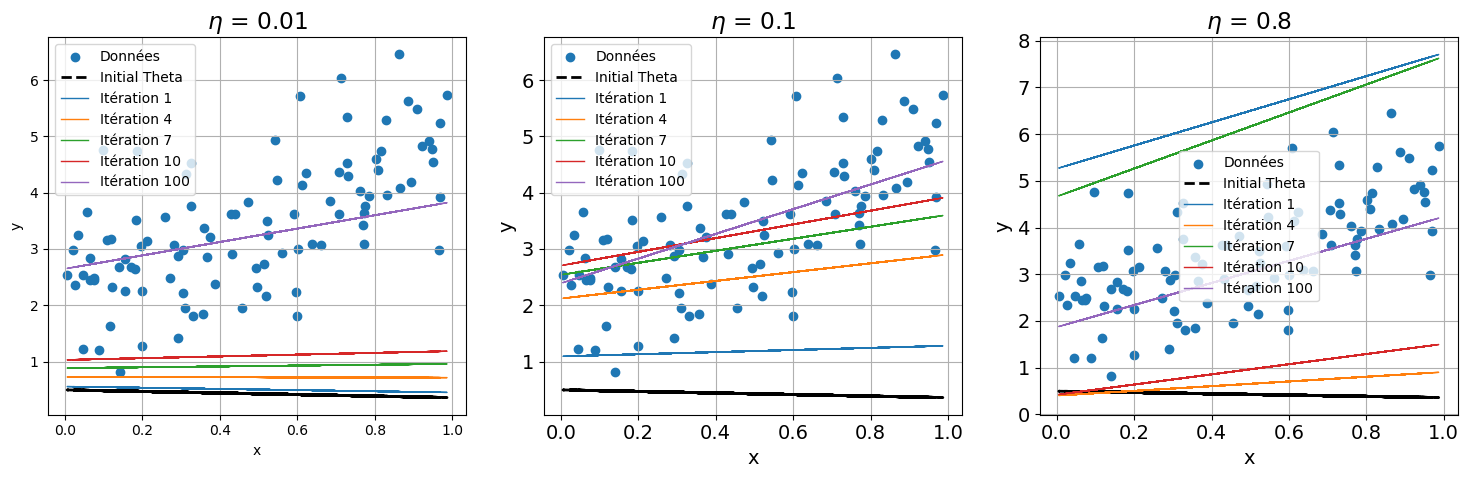


Valeurs finales de theta pour chaque valeur de eta :

Eta        Theta_0         Theta_1        
----------------------------------------
0.01       2.648126        1.189265       
0.1        2.390256        2.194057       
0.8        1.868200        2.364689       


In [20]:
# Initialisation des données et des hyperparamètres
np.random.seed(42)
m = 100  # Nombre d'observations
n_iterations = 100  # Nombre d'itérations
X_b = np.c_[np.ones((m, 1)), X]  # Ajout de x0 = 1 à chaque observation

list_eta = [0.01, 0.1, 0.8]  # Différents pas d'apprentissage
theta_init = np.random.randn(2, 1)  # Initialisation aléatoire de Theta
# Liste pour stocker les résultats
theta_results = []

cmap = 'viridis'

# Création de la figure pour les visualisations
fig = plt.figure(figsize=(15, 5))

# Boucle sur chaque valeur de pas d'apprentissage (eta)
for i, eta in enumerate(list_eta, start=1):
    theta = theta_init.copy()  # Copie de theta_init pour chaque eta
    
    plt.subplot(1, 3, i)  # Création des sous-graphiques
    plt.rcParams.update({'font.size': 14})
    plt.scatter(X, y, label="Données")  # Tracé des données d'origine
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f'$\\eta$ = {eta}')
    
    # Tracé de la droite initiale (Theta initial)
    y_pred_init = theta[0] + theta[1] * X
    plt.plot(X, y_pred_init, linestyle='--', color='k', linewidth=2, label='Initial Theta')
    
    # Boucle d'optimisation des paramètres avec descente de gradient
    for iteration in range(n_iterations):
        # Traçage pour les 10 premières itérations et la dernière
        if iteration < 10 and iteration % 3 == 0 or iteration == n_iterations - 1:
            draw_plot = True
        else:
            draw_plot = False

        theta = draw_theta(X, y, eta, theta, X_b, m, 1, iteration + 1, plt, draw_plot)
    
    plt.legend(fontsize=10)
    plt.grid(True)

    # Stockage des résultats
    theta_results.append([eta, theta[0][0], theta[1][0]])

# Affichage final des graphiques
plt.tight_layout()
plt.show()

# Affichage des résultats de theta
print("\nValeurs finales de theta pour chaque valeur de eta :\n")
print("{:<10} {:<15} {:<15}".format("Eta", "Theta_0", "Theta_1"))
print("-" * 40)
for eta, theta_0, theta_1 in theta_results:
    print(f"{eta:<10} {theta_0:<15.6f} {theta_1:<15.6f}")

<h3><span style="color: red; font-size: 40px">🎴</span> Figure 2.8 -  <span style="color: red">La descente de gradient (2x2)</span> </h3>

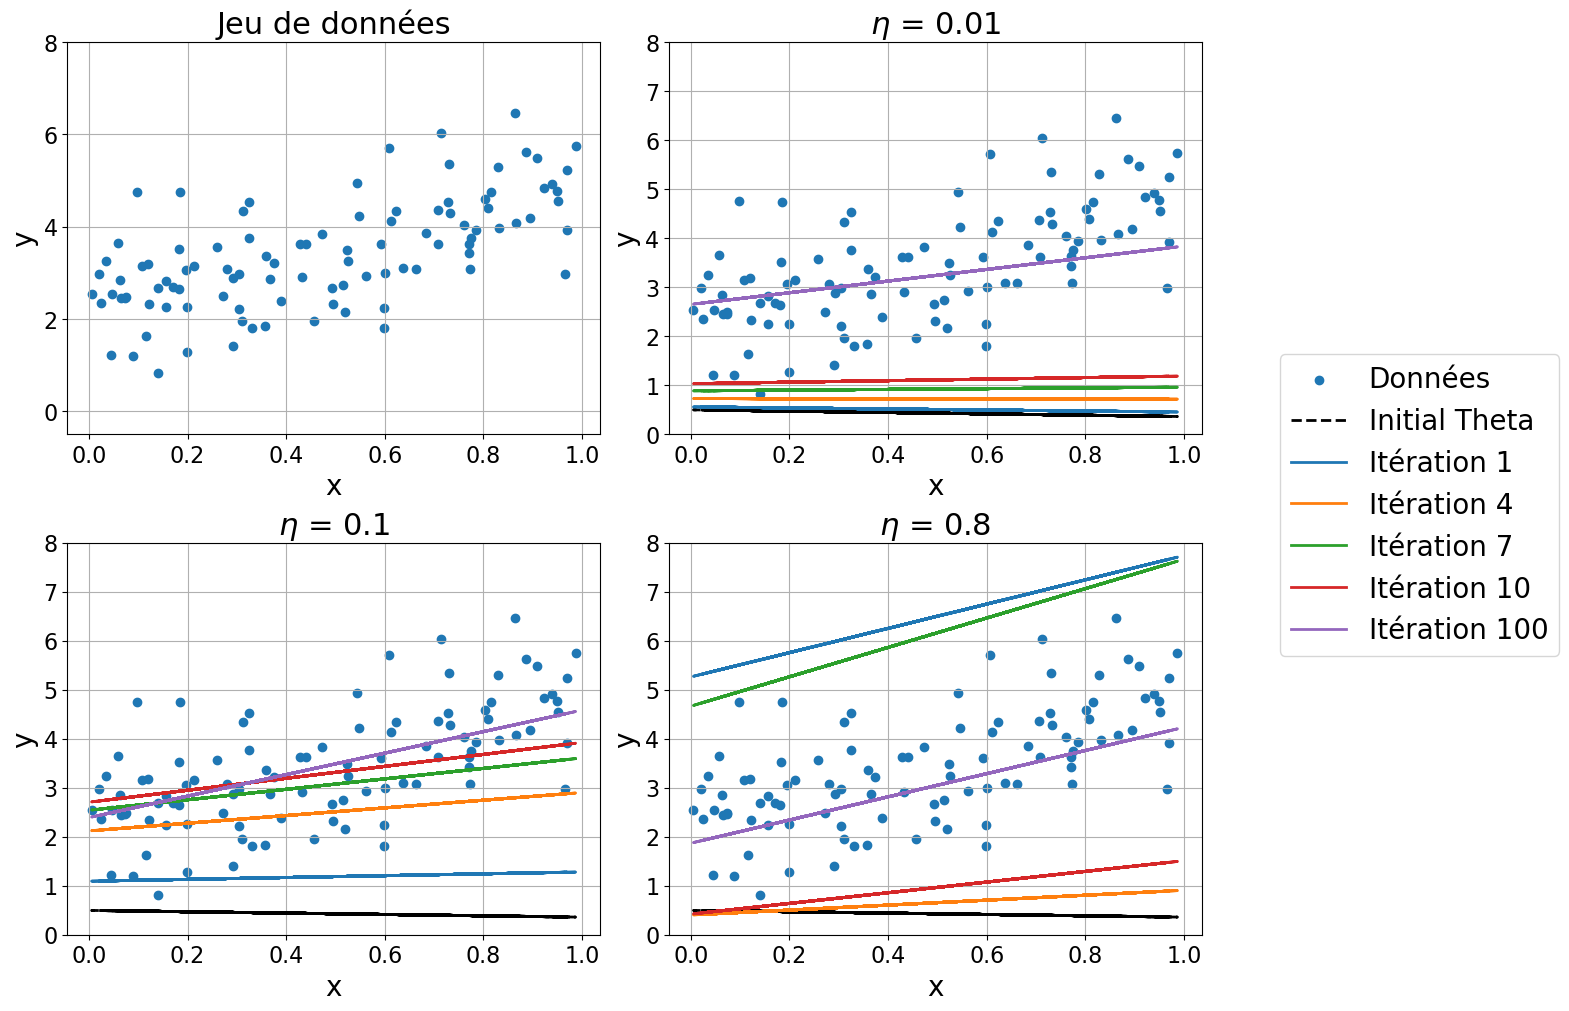


Valeurs finales de theta pour chaque valeur de eta :

Eta        Theta_0         Theta_1        
----------------------------------------
0.01       2.648126        1.189265       
0.1        2.390256        2.194057       
0.8        1.868200        2.364689       


In [21]:
# Initialisation des données et des hyperparamètres
np.random.seed(42)
m = 100  # Nombre d'observations
n_iterations = 100  # Nombre d'itérations
X_b = np.c_[np.ones((m, 1)), X]  # Ajout de x0 = 1 à chaque observation

list_eta = [0.01, 0.1, 0.8]  # Différents pas d'apprentissage
theta_init = np.random.randn(2, 1)  # Initialisation aléatoire de Theta

# Création de la figure pour les visualisations
fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axs = axs.ravel()  # Flatten the 2x2 array of axes for easy iteration

# Premier sous-graphe avec uniquement les points de données
axs[0].scatter(X, y, label="Données")
axs[0].set_xlabel("x", fontsize=20)
axs[0].set_ylabel("y", fontsize=20)
axs[0].set_title("Jeu de données", fontsize=22)
axs[0].tick_params(axis='both', labelsize=16)  # Augmenter la taille des ticks
axs[0].set_ylim(-0.5, 8)
axs[0].grid(True)

# Stockage des handles et labels pour une légende simplifiée
handles, labels = [], []
important_iterations = {0: "Itération 1", 3: "Itération 4", 6: "Itération 7", 9: "Itération 10", 99: "Itération 100"}

# Boucle sur chaque valeur de pas d'apprentissage (eta) pour les 3 autres sous-graphiques
for i, eta in enumerate(list_eta):
    ax = axs[i + 1]
    theta = theta_init.copy()  # Copie de theta_init pour chaque eta
    
    scatter = ax.scatter(X, y, label="Données")  # Tracé des données d'origine
    ax.set_xlabel("x", fontsize=20)
    ax.set_ylabel("y", fontsize=20)
    ax.set_title(f'$\\eta$ = {eta}', fontsize=22)
    ax.tick_params(axis='both', labelsize=16)  # Augmenter la taille des ticks
    ax.set_ylim(0, 8)  # y limit

    # Tracé de la droite initiale (Theta initial)
    y_pred_init = theta[0] + theta[1] * X
    line_init, = ax.plot(X, y_pred_init, linestyle='--', color='k', linewidth=2, label='Initial Theta')

    # Ajout des handles et labels (uniquement une fois)
    if i == 0:
        handles.append(scatter)
        labels.append("Données")
        handles.append(line_init)
        labels.append("Initial Theta")

    # Boucle d'optimisation des paramètres avec descente de gradient
    for iteration in range(n_iterations):
        draw_plot = iteration in important_iterations  # Vérifie si on doit tracer cette itération
        theta = draw_theta(X, y, eta, theta, X_b, m, 2, iteration, ax, draw_plot)
        
        # Ajouter une seule fois les itérations importantes à la légende
        if draw_plot and i == 0:
            handles.append(ax.get_lines()[-1])  # Récupérer la dernière ligne tracée
            labels.append(important_iterations[iteration])

    ax.grid(True)

# Ajouter une seule légende en dehors des subplots avec une taille plus grande
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=20)

# Affichage final des graphiques
plt.show()

# Affichage des résultats de theta
print("\nValeurs finales de theta pour chaque valeur de eta :\n")
print("{:<10} {:<15} {:<15}".format("Eta", "Theta_0", "Theta_1"))
print("-" * 40)
for eta, theta_0, theta_1 in theta_results:
    print(f"{eta:<10} {theta_0:<15.6f} {theta_1:<15.6f}")

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.8/Chap2_Figure_2.8")


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.8 : Descente de gradient stochastique en utilisant la fonction SGDRegressor</h3>

In [22]:
from sklearn.linear_model import SGDRegressor 

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([2.34557574]), array([2.38818668]))

In [23]:
# Résultat final des paramètres après n itérations
print(f"Résultats après {n_iterations} itérations de SGD :")
print(f"{'Paramètre':<20} {'Valeur':<15}")
print("-" * 40)
print(f"Theta_0 (intercept)  : {sgd_reg.intercept_[0]:.4f}")
print(f"Theta_1 (pente)      : {sgd_reg.coef_[0]:.4f}")
print("=" * 40)
print("L'équation de la droite ajustée est :")
print(f"y = {sgd_reg.intercept_[0]:.4f} + {sgd_reg.coef_[0]:.4f} * x")
print("=" * 40)


Résultats après 100 itérations de SGD :
Paramètre            Valeur         
----------------------------------------
Theta_0 (intercept)  : 2.3456
Theta_1 (pente)      : 2.3882
L'équation de la droite ajustée est :
y = 2.3456 + 2.3882 * x


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.9 : Implémentation de la fonction de descente de gradient stochastique</h3>

In [24]:
def stochastic_gradient_descent(X, y, theta, learning_rate, n_iterations, random_state=None):
    m = len(X)
    rng = np.random.RandomState(random_state)

    for iteration in range(n_iterations):
        indices = rng.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = X_shuffled[i:i+1]  # Sélectionner une ligne
            yi = y_shuffled[i:i+1]  # Sélectionner sa sortie

            # Calcul du gradient et mise à jour des paramètres
            gradients = xi.T.dot(xi.dot(theta) - yi) / m  
            theta = theta - learning_rate * gradients
    return theta

In [25]:
# Initialisation des données et des hyperparamètres
np.random.seed(42)

# Ajouter la colonne de biais (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Ajout d'une colonne de 1 pour l'intercept

# Paramètres d'initialisation
theta = np.random.randn(2, 1)  # Initialisation aléatoire des paramètres (theta_0 et theta_1)
learning_rate = 0.1  # Taux d'apprentissage
n_iterations = 1000  # Nombre maximal d'itérations
m = len(X_b)  # Nombre d'exemples

# Exécuter la descente de gradient stochastique
theta_final = stochastic_gradient_descent(X_b, y, theta, learning_rate, n_iterations, random_state=42)

In [26]:
# Affichage des résultats
intercept_ = theta_final[0][0]  # Intercept (Theta_0)
coef_ = theta_final[1][0]       # Coefficient (Theta_1)

print(f"Intercept (theta_0)  : {intercept_:.4f}")
print(f"Coefficient (theta_1): {coef_:.4f}")

Intercept (theta_0)  : 2.2140
Coefficient (theta_1): 2.5382


In [27]:
# Résultat final des paramètres après n itérations
print(f"Résultats après {n_iterations} itérations \navec la fonction 'stochastic_gradient_descent' :")
print(f"{'Paramètre':<20} {'Valeur':<15}")
print("-" * 50)
print(f"Theta_0 (intercept)  : {intercept_:4f}")
print(f"Theta_1 (pente)      : {coef_:4f}")
print("=" * 50)
print("L'équation de la droite ajustée est :")
print(f"y = {intercept_:4f} + {coef_:4f} * x")
print("=" * 50)

Résultats après 1000 itérations 
avec la fonction 'stochastic_gradient_descent' :
Paramètre            Valeur         
--------------------------------------------------
Theta_0 (intercept)  : 2.213988
Theta_1 (pente)      : 2.538222
L'équation de la droite ajustée est :
y = 2.213988 + 2.538222 * x


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.10 :Implémentation de la fonction de decsente de gradient par mini-lots</h3>

In [28]:
# Fonction pour la descente de gradient par mini-lots
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_iterations, batch_size, random_state=None):
    m = len(X)
    rng = np.random.RandomState(random_state)

    for iteration in range(n_iterations):
        # Mélanger les données au début de chaque époque
        indices = rng.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Parcourir les données par mini-lots
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Calculer le gradient pour le mini-lot et mise à jour
            gradients = X_batch.T.dot(X_batch.dot(theta) - y_batch) / batch_size
            theta = theta - learning_rate * gradients
    return theta

In [29]:
# Initialisation des données et des hyperparamètres
np.random.seed(42)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Ajout d'une colonne de 1 pour l'intercept
theta = np.random.randn(2, 1)  # Initialisation aléatoire de theta
learning_rate = 0.1
n_iterations = 1000
batch_size   = 16  # Taille des mini-lots

# Exécuter la descente de gradient par mini-lots
theta_final = mini_batch_gradient_descent(X_b, y, theta, learning_rate, n_iterations, batch_size, random_state=42)

# Affichage des résultats
intercept_manual = theta_final[0][0]
coef_manual = theta_final[1][0]

print("=" * 65)
print(f" Résultats après {n_iterations} itérations avec mini_batch_gradient_descent ")
print("=" * 65)
print("{:<25} {:>20}".format("Paramètre", "Valeur"))
print("-" * 65)
print("{:<25} {:>20.4f}".format("Theta_0 (intercept)", intercept_manual))
print("{:<25} {:>20.4f}".format("Theta_1 (pente)", coef_manual))
print("=" * 65)
print("L'équation de la droite ajustée est :")
print(f"y = {intercept_manual:.4f} + {coef_manual:.4f} * x")
print("=" * 65)

 Résultats après 1000 itérations avec mini_batch_gradient_descent 
Paramètre                               Valeur
-----------------------------------------------------------------
Theta_0 (intercept)                     2.2051
Theta_1 (pente)                         2.5328
L'équation de la droite ajustée est :
y = 2.2051 + 2.5328 * x


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.11 : Génération de données	polynomiales</h3>

In [30]:
# Initialisation des paramètres et génération des données
np.random.seed(42)
m = 100

X = 6 * np.random.rand(m, 1) - 3
y_o = 0.5 * X**2 + X + 2                       # Données originales
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Données bruitées

<h3><span style="color: red; font-size: 35px">🎴</span>Figure 2.9 :  Un ensemble de données (a) données originales et (b) données bruitées ou données réelles</h3>

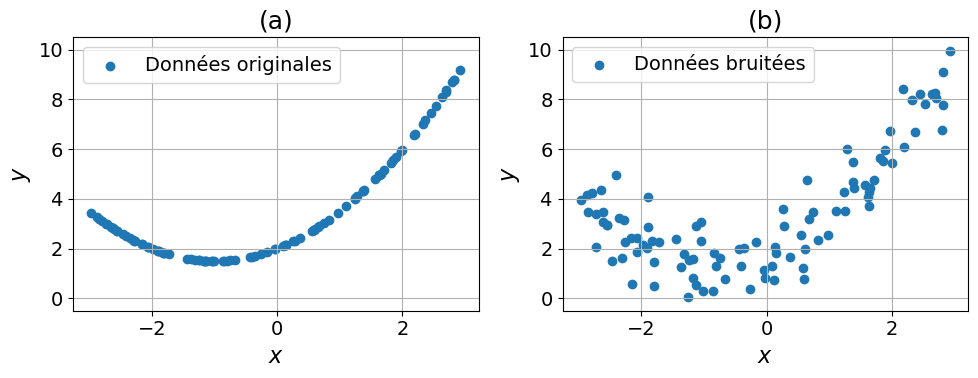

In [31]:
# Configuration des paramètres de police globaux
plt.rcParams.update({'font.size': 14})  # Taille par défaut pour tous les textes

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Création d'une figure avec 2 sous-graphiques

# Définition des tailles de police spécifiques
tick_fontsize = 14
label_fontsize = 16
title_fontsize = 18
legend_fontsize = 14

# Sous-graphe (a) : Données sans bruit
axes[0].scatter(X, y_o, label="Données originales")
axes[0].set_xlabel("$x$", fontsize=label_fontsize)
axes[0].set_ylabel("$y$", fontsize=label_fontsize)
axes[0].set_title("(a)", fontsize=title_fontsize)
axes[0].legend(fontsize=legend_fontsize)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)  # Taille des ticks
axes[0].grid(True)

# Sous-graphe (b) : Données avec bruit
axes[1].scatter(X, y, label="Données bruitées")
axes[1].set_xlabel("$x$", fontsize=label_fontsize)
axes[1].set_ylabel("$y$", fontsize=label_fontsize)
axes[1].set_title("(b)", fontsize=title_fontsize)
axes[1].legend(fontsize=legend_fontsize)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)  # Taille des ticks
axes[1].grid(True)

# Ajustement des limites de y pour une meilleure vue des données (facultatif)
axes[0].set_ylim(-0.5, 10.5)
axes[1].set_ylim(-0.5, 10.5)

# Sauvegarder la figure
fig.tight_layout()  # Ajustement pour éviter le chevauchement des sous-graphiques

plt.show()  # Afficher la figure

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.9/Chap2_Figure_2.9")


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.12 : Génération de données	polynomiales</h3>

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Transformation polynomiale
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Affichage des dimensions
print("Dimension de X:", X.shape)
print("Dimension de X_poly:", X_poly.shape)

Dimension de X: (100, 1)
Dimension de X_poly: (100, 2)


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.13 : Entraînement du modèle de régression polynomial</h3>

Ajustement du modèle de régression linéaire sur les caractéristiques polynomiales

In [33]:
from sklearn.linear_model import LinearRegression

# Création et ajustement du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Extraction des paramètres du modèle
intercept = lin_reg.intercept_[0]
coefficients = lin_reg.coef_.flatten()

# Affichage des résultats
print("=" * 50)
print("Paramètres du modèle de régression linéaire")
print("=" * 50)
print(f"Ordonnée à l'origine (intercept) : {intercept:.4f}")  
print("Coefficients :")
for i, coef in enumerate(coefficients, start=1):
    print(f"  - Coefficient {i} : {coef:.4f}") 
print("=" * 50)

Paramètres du modèle de régression linéaire
Ordonnée à l'origine (intercept) : 1.7813
Coefficients :
  - Coefficient 1 : 0.9337
  - Coefficient 2 : 0.5646


<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.10 : Un ensemble de données y = 2 + x + 0.5 x^2 + bruit. En magenta, le modèle de régression polynomial obtenu </h3>

In [34]:
# Génération de nouvelles données pour la prédiction
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

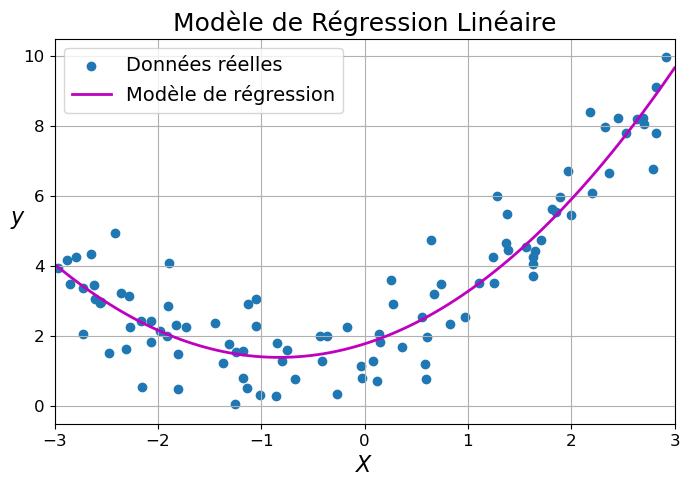

In [35]:
# Configuration des paramètres de police et de la taille de la figure
plt.rcParams.update({'font.size': 14})  # Taille globale par défaut

# Définition des tailles de police spécifiques
tick_fontsize = 12      # Taille des graduations (ticks)
label_fontsize = 16     # Taille des labels des axes X et Y
title_fontsize = 18     # Taille du titre
legend_fontsize = 14    # Taille de la légende

# Création de la figure
fig = plt.figure(figsize=(8, 5))

# Tracé des points de données
plt.scatter(X, y, label="Données réelles")

# Tracé du modèle de régression
plt.plot(X_new, y_new, "m-", linewidth=2, label="Modèle de régression")

# Paramètres des axes
plt.xlabel("$X$", fontsize=label_fontsize)
plt.ylabel("$y$", rotation=0, fontsize=label_fontsize)
plt.title("Modèle de Régression Linéaire", fontsize=title_fontsize)  # Ajout d'un titre

# Personnalisation des ticks (axes X et Y)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Configuration de la légende
plt.legend(loc="upper left", fontsize=legend_fontsize)

# Configuration des limites et du quadrillage
plt.axis([-3, 3, -0.5, 10.5])
plt.grid(True)

# Affichage de la figure
plt.show()

# Sauvegarde de la figure
save_figure(fig, "Figures/Figure_2.10/Chap2_Figure_2.10")


<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.11  - <span style="color: red"> (a) Degré 1, (b) Degré 30</span> </h3>

### Visualisation de la Transformation Polynomiale pour Différents Degrés

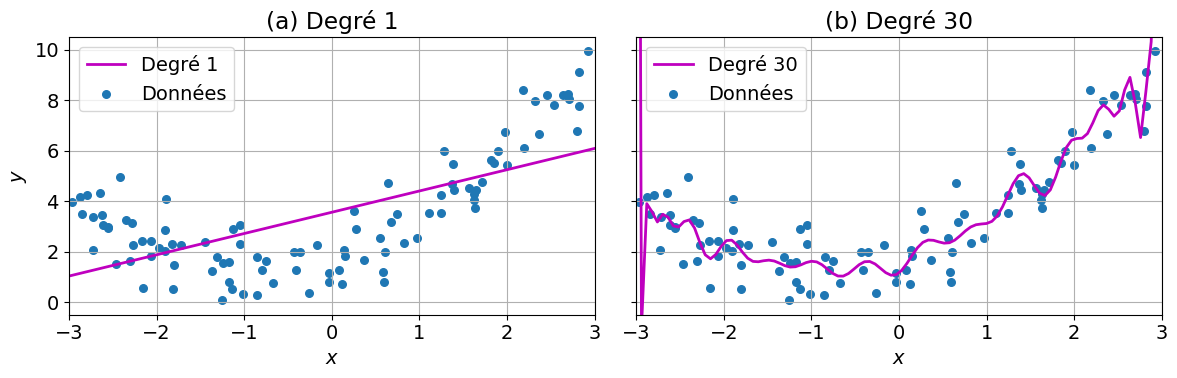

In [36]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Configuration de la taille de police pour les graphiques
plt.rcParams.update({'font.size': 14})

# Création de la figure avec 1 ligne et 3 colonnes de sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Définition des paramètres pour chaque degré de polynôme
degrees = [1, 30]
line_widths = [2, 2]
titles = ["(a) Degré 1", "(b) Degré 30"]

# Génération de nouvelles données pour la prédiction
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# Boucle sur chaque configuration de polynôme pour créer les sous-graphiques
for i, (degree, width, title) in enumerate(zip(degrees, line_widths, titles)):
    # Pipeline pour la régression polynomiale
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])
    polynomial_regression.fit(X, y)
    y_new = polynomial_regression.predict(X_new)
    
    # Création de chaque sous-graphe
    axes[i].plot(X_new, y_new, 'm-', label=f"Degré {degree}", linewidth=width)
    axes[i].scatter(X, y, s=30, label="Données")
    axes[i].set_title(title)
    axes[i].set_xlabel("$x$")
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-0.5, 10.5)
    if i == 0:
        axes[i].set_ylabel("$y$")
    axes[i].legend(loc="upper left")
    axes[i].grid(True)

# Ajustement de l'espacement et affichage de la figure
plt.tight_layout()
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_2.11/Chap2_Figure_2.11")

<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.x - <span style="color: red"> La_régression_logistique</span> </h3>

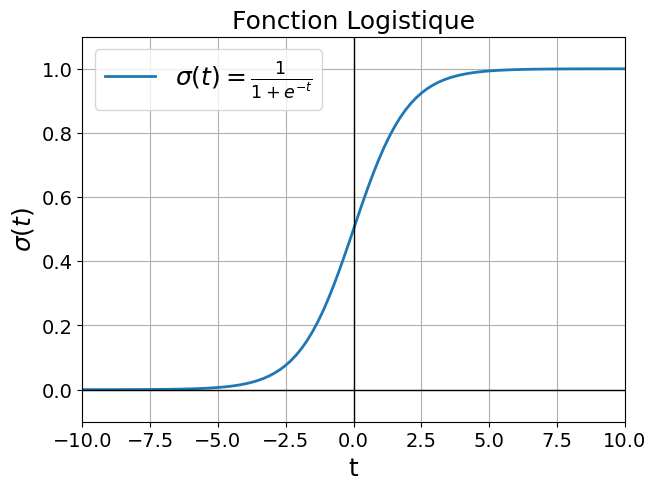

In [37]:
# Définition de la fonction logistique
def logistic_function(t):
    return 1 / (1 + np.exp(-t))

# Génération des valeurs de t
t = np.linspace(-10, 10, 100)

# Calcul des valeurs de la fonction logistique
sigma_t = logistic_function(t)

# Définition des tailles de police spécifiques
tick_fontsize = 14      # Taille des graduations (ticks)
label_fontsize = 18     # Taille des labels des axes X et Y
title_fontsize = 18     # Taille du titre
legend_fontsize = 18    # Taille de la légende

# Création du graphique avec une taille optimisée
fig = plt.figure(figsize=(7, 5))

# Tracé de la fonction logistique
plt.plot(t, sigma_t, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")

# Ajout des axes de référence
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)

# Paramètres des axes
plt.xlabel("t", fontsize=label_fontsize)
plt.ylabel(r"$\sigma(t)$", fontsize=label_fontsize)
plt.title("Fonction Logistique", fontsize=title_fontsize)

# Personnalisation des ticks (axes X et Y)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Configuration de la légende
plt.legend(loc="upper left", fontsize=legend_fontsize)

# Configuration des limites et du quadrillage
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Limites de l'axe y pour mieux encadrer la courbe
plt.xlim(-10, 10)  # Limites de l'axe x pour mieux encadrer la courbe

# Affichage de la figure
plt.show()

# Sauvegarde de la figure
save_figure(fig, "Figures/Figure_2.x_Figure_La_régression_logistique/Chap2_Figure_La_régression_logistique")


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.14 : Lecture des données Iris</h3>

In [38]:
from sklearn import datasets

# Chargement du jeu de données Iris depuis la bibliothèque scikit-learn
iris = datasets.load_iris()

# Conversion des données en DataFrame avec les noms de caractéristiques comme en-têtes de colonnes
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ajout d'une colonne 'target' représentant l'espèce (0: setosa, 1: versicolor, 2: virginica)
iris_df['target'] = iris.target

In [39]:
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.13 : Dispersion de la largeur des pétales (Petal width) en fonction de la largeur des pétales (Petal width) pour les trois espèces (classes)</h3>

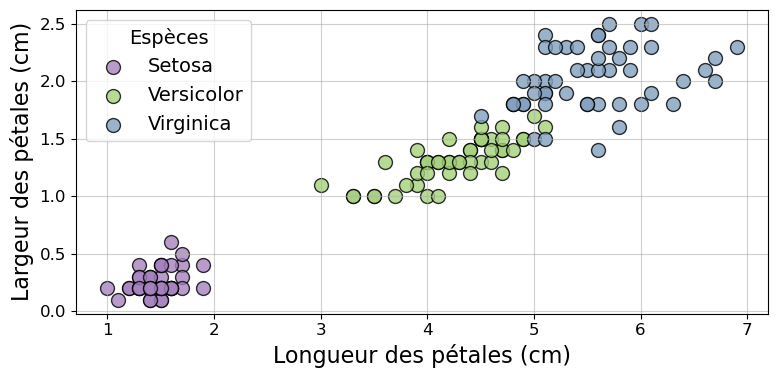

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Charger les données Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Renommer les colonnes pour simplification
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'species_name']

# Couleurs spécifiées pour les classes
colors = {
    'Setosa': '#a682bf',
    'Versicolor': '#a5d17b',
    'Virginica': '#829fbf'
}

# Définition des tailles de police spécifiques
tick_fontsize = 12      # Taille des graduations (ticks)
label_fontsize = 16     # Taille des labels des axes X et Y
title_fontsize = 18     # Taille du titre
legend_fontsize = 14    # Taille de la légende

# Création de la figure
fig = plt.figure(figsize=(8, 4))

# Boucle sur chaque espèce pour tracer les points
for species, color in colors.items():
    subset = df[df['species_name'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], 
                label=species, color=color, edgecolor='black', alpha=0.8, s=100, marker='o')

# Paramètres des axes
plt.xlabel("Longueur des pétales (cm)", fontsize=label_fontsize)
plt.ylabel("Largeur des pétales (cm)", fontsize=label_fontsize)
# plt.title("Dispersion des pétales des fleurs Iris", fontsize=title_fontsize)

# Personnalisation des ticks (axes X et Y)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Configuration de la légende
plt.legend(title="Espèces", fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Configuration du quadrillage
plt.grid(True, linestyle='-', alpha=0.6)

# Ajustement de la mise en page et sauvegarde
plt.tight_layout()
save_figure(fig, "Figures/Figure_2.13/Chap2_Figure_2.13")

# Affichage du graphique
plt.show()


<h3><span style="color: red; font-size: 35px">🎴</span>Figure 2.14 : Dispersion de la largeur des pétales (Petal width) en fonction de la largeur des pétales (Petal width) pour les deux classes </h3>

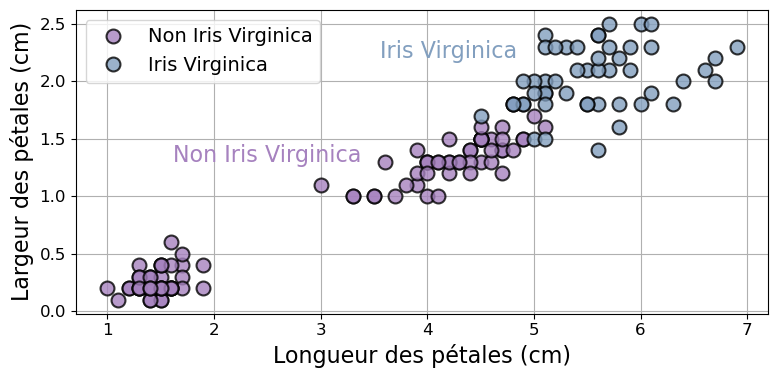

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Extraire les variables 'petal length (cm)' et 'petal width (cm)' et former la matrice X
X = iris_df[['petal length (cm)', 'petal width (cm)']].to_numpy()

# Créer la variable cible : 1 si l'espèce est 'Virginica', sinon 0
y = (iris.target == 2).astype(int)

# Définition des tailles de police spécifiques
tick_fontsize = 12      # Taille des graduations (ticks)
label_fontsize = 16     # Taille des labels des axes X et Y
title_fontsize = 18     # Taille du titre
legend_fontsize = 14    # Taille de la légende

# Configuration de la figure
fig = plt.figure(figsize=(8, 4))

# Tracer les points de données pour chaque classe
plt.plot(X[y==0, 0], X[y==0, 1], "o", alpha=0.8, color='#a682bf', markersize=10, markeredgewidth=1.5, 
         markeredgecolor='black', label="Non Iris Virginica")  # Classe non virginica
plt.plot(X[y==1, 0], X[y==1, 1], "o", alpha=0.8, color='#829fbf', markersize=10, markeredgewidth=1.5, 
         markeredgecolor='black', label="Iris Virginica")  # Classe virginica

# Paramètres des axes
plt.xlabel("Longueur des pétales (cm)", fontsize=label_fontsize)
plt.ylabel("Largeur des pétales (cm)", fontsize=label_fontsize)
#plt.title("Dispersion des Pétales - Classification Binaire", fontsize=title_fontsize)

# Personnalisation des ticks (axes X et Y)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Affichage de la légende
plt.legend(fontsize=legend_fontsize, loc="upper left")

# Ajout d'annotations pour les classes
plt.text(2.5, 1.3, "Non Iris Virginica", fontsize=16, ha="center", color="#a682bf")
plt.text(4.2, 2.2, "Iris Virginica", fontsize=16, ha="center", color="#829fbf")

# Configuration du quadrillage
plt.grid(True)

# Ajustement de la mise en page et sauvegarde
plt.tight_layout()
save_figure(fig, "Figures/Figure_2.14/Chap2_Figure_2.14")

# Affichage du graphique
plt.show()


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.15 : Transformation des labels en deux classes</h3>

In [42]:
# Extraire les variables 'petal length (cm)' et créer la matrice X
X = iris_df[['petal length (cm)']].values

# Ajouter la colonne cible 'target'
iris_df['target'] = iris.target

# Créer la variable cible : 1 si l'espèce est 'Virginica', sinon 0
y = (iris_df['target'] == 2).astype(int).values

<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.15 : Représentation de la longueur des pétales pour les deux classes suivantes : classe 0 (Non Iris Virginica) et classe 1 (Iris Virginica)</h3>

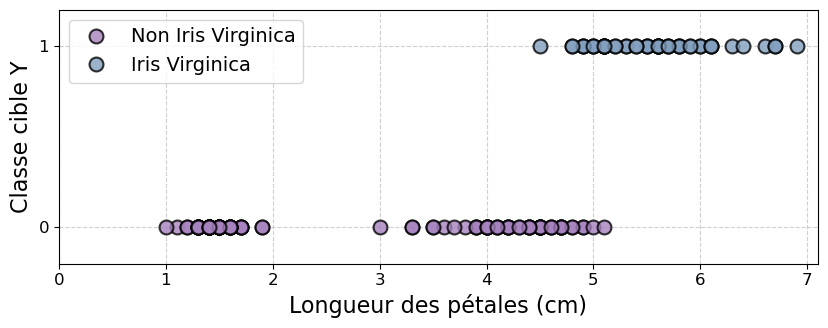

In [43]:
# Définition des tailles de police spécifiques
tick_fontsize = 12      # Taille des graduations (ticks)
label_fontsize = 16     # Taille des labels des axes X et Y
title_fontsize = 18     # Taille du titre
legend_fontsize = 14    # Taille de la légende

# Configuration de la figure
fig = plt.figure(figsize=(8.5, 3.5))

# Tracer les points de données pour chaque classe avec couleurs et bordures distinctes
plt.plot(X[y == 0, 0], y[y == 0], "o", alpha=0.8, color="#a682bf", markersize=10, 
         markeredgewidth=1.5, markeredgecolor="black", label="Non Iris Virginica")  # Classe non virginica
plt.plot(X[y == 1, 0], y[y == 1], "o", alpha=0.8, color="#829fbf", markersize=10, 
         markeredgewidth=1.5, markeredgecolor="black", label="Iris Virginica")  # Classe virginica

# Paramètres des axes
plt.xlabel("Longueur des pétales (cm)", fontsize=label_fontsize)
plt.ylabel("Classe cible Y", fontsize=label_fontsize)

# Limites des axes
plt.xlim(0, 7.1)
plt.ylim(-0.2, 1.2)  # Pour une meilleure distinction des classes

# Ajout d'un titre clair
# plt.title("Classification Binaire selon la Longueur du Pétale", fontsize=title_fontsize)

# Personnalisation des ticks (axes X et Y)
plt.xticks(fontsize=tick_fontsize)
# plt.yticks([0, 1], labels=["Non Iris Virginica (0)", "Iris Virginica (1)"], fontsize=tick_fontsize)  # Ajout de labels explicites pour Y
plt.yticks([0, 1], labels=["0", "1"], fontsize=tick_fontsize)  # Ajout de labels explicites pour Y

# Affichage de la légende
plt.legend(fontsize=legend_fontsize, loc="upper left")

# Affichage de la grille
plt.grid(True, linestyle="--", alpha=0.6)

# Ajustement de la mise en page et sauvegarde
plt.tight_layout()
save_figure(fig, "Figures/Figure_2.15/Chap2_Figure_2.15")

# Affichage du graphique
plt.show()


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.16 : Entraînement du modèle de régression logistique</h3>

In [44]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X, y)

#Paramètres du modèle
log_reg.intercept_ , log_reg.coef_

(array([-17.41227476]), array([[3.57107582]]))

In [45]:
# Récupération des paramètres
intercept = log_reg.intercept_[0]
coefficient = log_reg.coef_[0][0]

# Créer l'équation LaTeX
equation_latex = r" \large \hat{{p}} = \frac{{1}}{{1 + e^{{-({:.2f} + {:.2f} \cdot x)}}}}".format(intercept, coef)

# Affichage des résultats
print("=" * 60)
print(" Résultats de la régression logistique binaire (Virginica vs autres)")
print("=" * 60)
print("{:<25} {:>20}".format("Paramètre", "Valeur"))
print("-" * 60)
print("{:<25} {:>20.4f}".format("Intercept (biais)", intercept))
print("{:<25} {:>20.4f}".format("Coefficient (petal length)", coefficient))
print("=" * 60)
print("L'équation du modèle logistique est :")
display(Math(equation_latex))
print("=" * 60)


 Résultats de la régression logistique binaire (Virginica vs autres)
Paramètre                               Valeur
------------------------------------------------------------
Intercept (biais)                     -17.4123
Coefficient (petal length)               3.5711
L'équation du modèle logistique est :


<IPython.core.display.Math object>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.17 : Visualisation des probabilités prédites du modèle de régression logistique</h3>

<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.16 : Les points montrent les observations réelles des deux classes (classe Non Iris Virginica et classe Iris Virginica. Les courbes représentent les probabilités prédites par le modèle de régression </h3>

Paramètres du modèle de régression logistique:
Intercept (𝜃0):      -17.412
Coefficient (𝜃1):    3.571

l'équation de régression logistique correspondant:


<IPython.core.display.Math object>

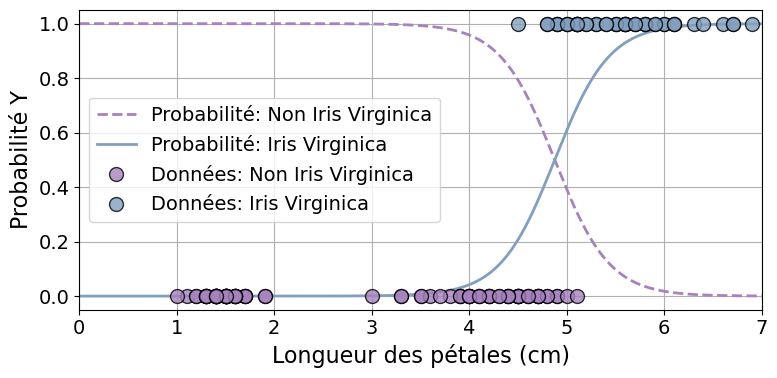

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Charger le dataset Iris et transformer en DataFrame
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Préparation des données pour la classification (petal length)
X = iris_df[['petal length (cm)']].values
y = (iris_df['target'] == 2).astype(int).values  # Classe binaire: 1 si Iris virginica, sinon 0

# Création et entraînement du modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Affichage formaté des paramètres du modèle
intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]
print("Paramètres du modèle de régression logistique:")
print(f"{'Intercept (𝜃0):':<20} {intercept:.3f}")
print(f"{'Coefficient (𝜃1):':<20} {coef:.3f}")

print("\nl'équation de régression logistique correspondant:")
# Créer l'équation LaTeX
equation_latex = r" \large \hat{{p}} = \frac{{1}}{{1 + e^{{-({:.2f} + {:.2f} \cdot x)}}}}".format(intercept, coef)

# Afficher l'équation en utilisant LaTeX
display(Math(equation_latex))

# Générer des valeurs de 'petal length' pour prédire les probabilités
X_new = np.linspace(0, 7, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# Configuration de la figure pour les données de classe et les probabilités
fig = plt.figure(figsize=(8,4))

# Tracer les probabilités de chaque classe
plt.plot(X_new, y_proba[:, 0], color='#a682bf', linestyle="--", linewidth=2, label="Probabilité: Non Iris Virginica")
plt.plot(X_new, y_proba[:, 1], color='#829fbf', linestyle="-", linewidth=2, label="Probabilité: Iris Virginica")

# Tracer les points de données pour chaque classe avec couleurs et bordures distinctes
plt.plot(X[y == 0], y[y == 0], "o", color="#a682bf", alpha=0.8, markersize=10, markeredgewidth=1, markeredgecolor='black', label="Données: Non Iris Virginica")
plt.plot(X[y == 1], y[y == 1], "o", color="#829fbf", alpha=0.8, markersize=10, markeredgewidth=1, markeredgecolor='black', label="Données: Iris Virginica")

# Étiquettes des axes et titre du graphique
plt.xlabel("Longueur des pétales (cm)", fontsize=16)
plt.ylabel("Probabilité Y", fontsize=16)
#plt.title("Variation de la classe cible Y et probabilité en fonction de Petal length", fontsize=18)

# Affichage de la légende et de la grille
plt.legend(loc="center left", fontsize=14)
plt.grid(True)
plt.xlim(0, 7)

# Ajustement de la mise en page et sauvegarde
plt.tight_layout()
save_figure(fig, "Figures/Figure_2.16/Chap2_Figure_2.16")

# Affichage du graphique
plt.show()

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.18 : Calcul de la valeur de la variable au seuil de décision</h3>

In [47]:
# Récupérer les paramètres du modèle
theta_0 = log_reg.intercept_[0]  # Interception (biais)
theta_1 = log_reg.coef_[0][0]   # Coefficient pour 'petal length'

# Calcul de la longueur de pétale correspondant au seuil de décision
petal_length_decision_threshold = -theta_0 / theta_1
print(f"Longueur de pétale au seuil de décision : {petal_length_decision_threshold:.4f}")

Longueur de pétale au seuil de décision : 4.8759


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.19 : Regression Softmax - Régression logistique multinomiale</h3>

La regression logistique peut être transformée en regression softmax en donnant à l'hyperparamètre multi_class la valeur "multinomial"

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Chargement du jeu de données Iris
iris = datasets.load_iris()

# Préparation des données
# On utilise 'petal length (cm)' et 'petal width (cm)' comme variables explicatives
X = iris["data"][:, 2:4]

# La variable cible est l'espèce de l'Iris (0, 1 ou 2)
y = iris["target"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données pour améliorer la convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Création et entraînement du modèle de régression Softmax
softmax_reg = LogisticRegression(solver="lbfgs", random_state=42)
softmax_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [49]:
# Évaluation du modèle
score = softmax_reg.score(X_test_scaled, y_test)
print(f"Score du modèle : {score:.4f}")

# Affichage des coefficients du modèle
print("Paramètres du modèle de régression Softmax:\n")
print(f"{'Classe':<10} {'Intercept (𝜃0)':<20} {'Coefficient 𝜃1 (petal length)':<30} {'Coefficient 𝜃2 (petal width)':<30}")
print("-" * 90)
for i, (intercept, coef) in enumerate(zip(softmax_reg.intercept_, softmax_reg.coef_)):
    print(f"{i:<10} {intercept:<20.6f} {coef[0]:<30.6f} {coef[1]:<30.6f}")

Score du modèle : 1.0000
Paramètres du modèle de régression Softmax:

Classe     Intercept (𝜃0)       Coefficient 𝜃1 (petal length)  Coefficient 𝜃2 (petal width)  
------------------------------------------------------------------------------------------
0          -0.561673            -2.416878                      -2.155351                     
1          1.904470             0.113933                       -0.364646                     
2          -1.342797            2.302945                       2.519997                      


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 2.20 : Rapport de la régression logistique multinomiale</h3>

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prédictions sur l'ensemble de test
y_pred = softmax_reg.predict(X_test_scaled)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print("\n=== Évaluation du modèle ===")
print(f"Précision (Accuracy): {accuracy:.2f}")
print("\nMatrice de confusion:")
print(conf_matrix)
print("\nRapport de classification:")
print(report)

# Résumer les coefficients appris
print("\nCoefficients du modèle:")
print(softmax_reg.coef_)
print("\nIntercept du modèle:")
print(softmax_reg.intercept_)



=== Évaluation du modèle ===
Précision (Accuracy): 1.00

Matrice de confusion:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Coefficients du modèle:
[[-2.41687809 -2.15535088]
 [ 0.11393263 -0.36464587]
 [ 2.30294545  2.51999676]]

Intercept du modèle:
[-0.56167282  1.90446994 -1.34279712]


<h3><span style="color: red; font-size: 35px">🎴</span> Figure 2.xx - Représentez la frontière de décision Softmax </h3>

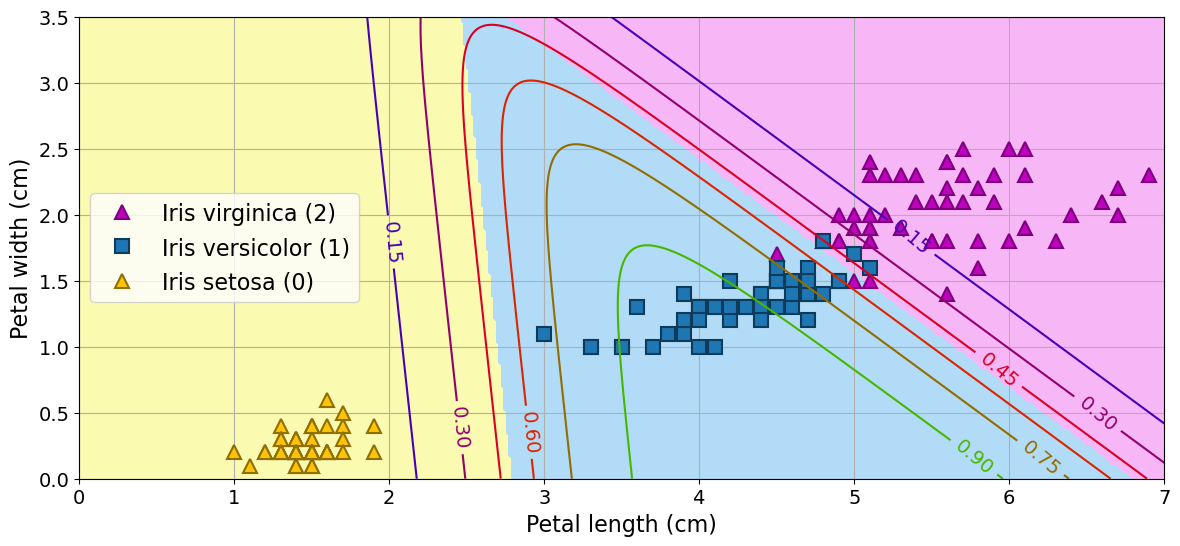

In [51]:
# Chargement du jeu de données Iris et préparation des données
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Utilisation des caractéristiques 'petal length' et 'petal width'
y = iris["target"]  # Les cibles : espèces de l'Iris (0, 1 ou 2)

# Création et entraînement du modèle de régression Softmax
modele_softmax = LogisticRegression(solver="lbfgs", random_state=42)
modele_softmax.fit(X, y)

# Génération de la grille pour représenter la frontière de décision
x0_grid, x1_grid = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_grille = np.c_[x0_grid.ravel(), x1_grid.ravel()]

# Prédiction des probabilités et des classes sur la grille
probabilites_classe = modele_softmax.predict_proba(X_grille)
predictions_classe = modele_softmax.predict(X_grille)

# Reshape pour la visualisation
probabilite_versicolor = probabilites_classe[:, 1].reshape(x0_grid.shape)  # Probabilités pour la classe Iris versicolor (1)
frontiere_decision = predictions_classe.reshape(x0_grid.shape)  # Prédictions de classe

# Configuration de la figure pour afficher la frontière de décision et les données
fig = plt.figure(figsize=(14, 6))

# Tracé des points de données pour chaque classe avec couleurs et symboles distincts
plt.plot(X[y == 2, 0], X[y == 2, 1], "^", color="#be02be", markersize=10, markeredgewidth=1.5, 
         markeredgecolor="#7e007e", label="Iris virginica (2)")
plt.plot(X[y == 1, 0], X[y == 1, 1], "s", color="#1e76b3", markersize=10, markeredgewidth=1.5, 
         markeredgecolor="#0f3b5b", label="Iris versicolor (1)")
plt.plot(X[y == 0, 0], X[y == 0, 1], "^", color="#ffc403", markersize=10, markeredgewidth=1.5, 
         markeredgecolor="#8f6e03", label="Iris setosa (0)")

# Configuration du colormap pour les zones de décision
couleurs_zones = ListedColormap(['#fafab0', '#b2dbf7', '#f7b7f7'])
plt.contourf(x0_grid, x1_grid, frontiere_decision, cmap=couleurs_zones)

# Tracé des contours de probabilité pour la classe Iris versicolor (1)
contours_probabilite = plt.contour(x0_grid, x1_grid, probabilite_versicolor, cmap=plt.cm.brg)
plt.clabel(contours_probabilite, inline=1, fontsize=14)

# Configuration des étiquettes et légende
plt.xlabel("Petal length (cm)", fontsize=16)
plt.ylabel("Petal width (cm)", fontsize=16)
plt.legend(loc="center left", fontsize=16)

# Limites des axes et affichage du graphique
plt.axis([0, 7, 0, 3.5])
plt.grid(True)
plt.show()

# Sauvegarder la figure
#save_figure(fig, "Figures/Figure_2.13/Chap2_Figure_2.13")

<hr style='border-top:4px solid #1F77B4;'>